# Song Recommender System

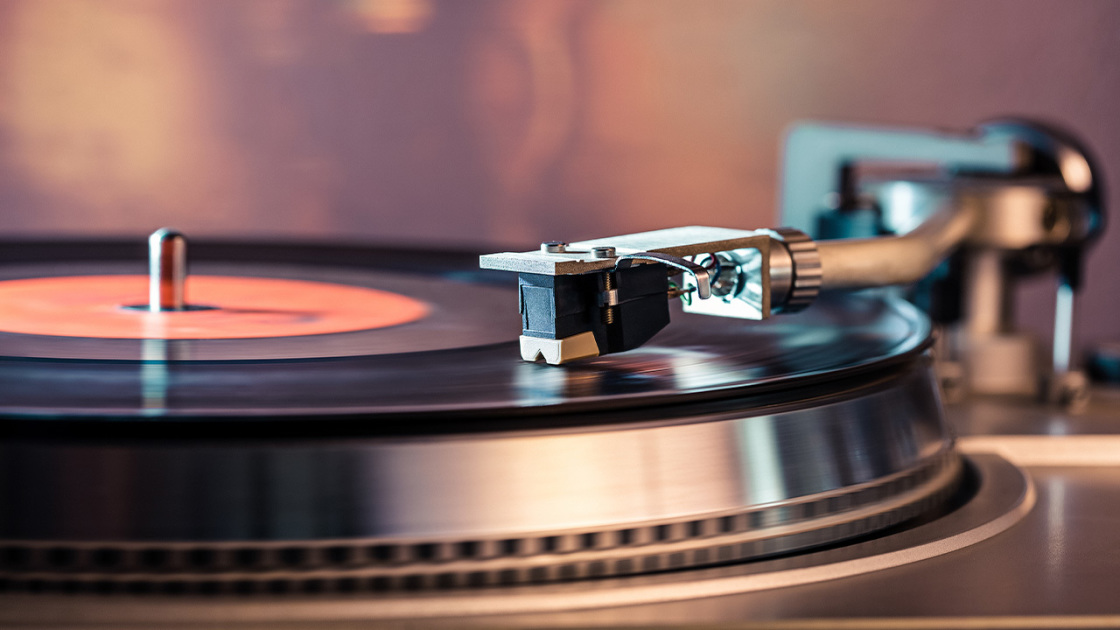

In [4]:
from IPython.display import Image
Image(filename='image.jpg')

**FLOWCHART**

It's the moment to perform clustering on the songs we collected.  
Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The song list collected with the Spotify API and the Billboard web scraping will allow us to create a pipeline such that when the user enters a song:

1 -Check whether or not the song is in the Billboard Hot 100.

2 -If the songs is in that list we suggest the user another song from this list --> END

3 -If the song is not in the Billboard Hot 100 -->

    1-Collect the audio features from the Spotify API.
    
    2-After that, we send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.
    
    3-The system recommends another song to the user from the same cluster -->END


In [1]:
#Import libraries
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

# K-means
import numpy as np
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D


In [2]:
#Importing the spotify playlist I created in previous lab

In [3]:
spotify_data = pd.read_csv('spotify_data_long.csv') 

In [4]:
spotify_data.head()

,artist,song_title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Nosaj Thing,2K,0.310,0.445,7.0,-13.355,0.0,0.0863,0.0940,0.06780,0.1130,0.122,95.360
1,The Doors,4 Billion Souls,0.419,0.565,5.0,-11.565,1.0,0.0347,0.1370,0.33700,0.1280,0.648,151.277
2,Radiohead,4 Minute Warning,0.354,0.302,9.0,-13.078,1.0,0.0326,0.5900,0.07090,0.1110,0.223,123.753
3,Vitas,7 Element,0.727,0.785,5.0,-6.707,0.0,0.0603,0.3250,0.12600,0.3100,0.960,129.649
4,R.E.M.,#9 Dream,0.571,0.724,0.0,-5.967,1.0,0.0260,0.0231,0.00311,0.0919,0.385,116.755


In [5]:
spotify_data.columns

Index(['artist', 'song_title', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

In [6]:
spotify_data.isnull().sum()

artist              62
song_title           1
danceability        82
energy              82
key                 82
loudness            82
mode                82
speechiness         82
acousticness        82
instrumentalness    82
liveness            82
valence             82
tempo               82
dtype: int64

In [7]:
#DROPING NaN VALUES
#We will drop all row with Nan in danceability and check that they are the same rows that have new values in the resto of columns.
spotify_data = spotify_data.drop(spotify_data[spotify_data['danceability'].isnull()].index,axis=0) # with the index your selecting the 
#exactly values of 'GENDER' NaN
spotify_data= spotify_data.reset_index(drop=True)# reset the index
print(spotify_data.shape)
spotify_data.head()

(9918, 13)


,artist,song_title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Nosaj Thing,2K,0.310,0.445,7.0,-13.355,0.0,0.0863,0.0940,0.06780,0.1130,0.122,95.360
1,The Doors,4 Billion Souls,0.419,0.565,5.0,-11.565,1.0,0.0347,0.1370,0.33700,0.1280,0.648,151.277
2,Radiohead,4 Minute Warning,0.354,0.302,9.0,-13.078,1.0,0.0326,0.5900,0.07090,0.1110,0.223,123.753
3,Vitas,7 Element,0.727,0.785,5.0,-6.707,0.0,0.0603,0.3250,0.12600,0.3100,0.960,129.649
4,R.E.M.,#9 Dream,0.571,0.724,0.0,-5.967,1.0,0.0260,0.0231,0.00311,0.0919,0.385,116.755


In [8]:
spotify_data.isnull().sum()

artist              62
song_title           1
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
dtype: int64

In [9]:
#We will drop all row with Nan in artist
spotify_data = spotify_data.drop(spotify_data[spotify_data['artist'].isnull()].index,axis=0) # with the index your selecting the 
#exactly values of 'GENDER' NaN
spotify_data= spotify_data.reset_index(drop=True)# reset the index
print(spotify_data.shape)
spotify_data.head()

(9856, 13)


,artist,song_title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Nosaj Thing,2K,0.310,0.445,7.0,-13.355,0.0,0.0863,0.0940,0.06780,0.1130,0.122,95.360
1,The Doors,4 Billion Souls,0.419,0.565,5.0,-11.565,1.0,0.0347,0.1370,0.33700,0.1280,0.648,151.277
2,Radiohead,4 Minute Warning,0.354,0.302,9.0,-13.078,1.0,0.0326,0.5900,0.07090,0.1110,0.223,123.753
3,Vitas,7 Element,0.727,0.785,5.0,-6.707,0.0,0.0603,0.3250,0.12600,0.3100,0.960,129.649
4,R.E.M.,#9 Dream,0.571,0.724,0.0,-5.967,1.0,0.0260,0.0231,0.00311,0.0919,0.385,116.755


In [10]:
spotify_data.isnull().sum()
spotify_data.shape

artist              0
song_title          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

(9856, 13)

In [11]:
#we don´t have NaN values now!!

## K-MEANS:Cluster the songs collected:

In [12]:
# - KMeans cannot deal with categorical variables. We will select only numerical variables
features=spotify_data[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]
features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.310,0.445,7.0,-13.355,0.0,0.0863,0.0940,0.06780,0.1130,0.122,95.360
1,0.419,0.565,5.0,-11.565,1.0,0.0347,0.1370,0.33700,0.1280,0.648,151.277
2,0.354,0.302,9.0,-13.078,1.0,0.0326,0.5900,0.07090,0.1110,0.223,123.753
3,0.727,0.785,5.0,-6.707,0.0,0.0603,0.3250,0.12600,0.3100,0.960,129.649
4,0.571,0.724,0.0,-5.967,1.0,0.0260,0.0231,0.00311,0.0919,0.385,116.755


In [13]:
# K-Means is a distance based algorithm: we need to scale / normalize:
scaler=StandardScaler().fit_transform(features)
scaler

array([[-1.622493  , -0.73978923,  0.50047519, ..., -0.48243773,
        -1.46514462, -0.8720102 ],
       [-0.93644935, -0.22739506, -0.05616685, ..., -0.39076522,
         0.65843684,  1.07550353],
       [-1.34555795, -1.35039227,  1.05711724, ..., -0.49466073,
        -1.05738468,  0.11687972],
       ...,
       [ 0.74404289, -0.03524725,  0.50047519, ..., -0.73912075,
         1.13482964, -1.38723045],
       [ 0.90139235,  0.4259075 ,  0.22215417, ..., -0.72567545,
         0.81992593, -0.11584534],
       [-1.54067128,  1.61722394, -1.16945095, ...,  4.62066519,
        -0.68595979,  2.77113645]])

In [14]:
# Now, all features will have the same weight.
X_scaled=pd.DataFrame(scaler,columns=features.columns)
X_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.622493,-0.739789,0.500475,-1.208173,-1.360221,0.161245,-0.624206,-0.192944,-0.482438,-1.465145,-0.872010
1,-0.936449,-0.227395,-0.056167,-0.791631,0.735174,-0.464373,-0.488015,0.836161,-0.390765,0.658437,1.075504
2,-1.345558,-1.350392,1.057117,-1.143714,0.735174,-0.489834,0.946738,-0.181093,-0.494661,-1.057385,0.116880
3,1.002096,0.711994,-0.056167,0.338850,-1.360221,-0.153989,0.107423,0.029545,0.721528,1.918052,0.322229
4,0.020235,0.451527,-1.447772,0.511052,0.735174,-0.569855,-0.848762,-0.440242,-0.611390,-0.403354,-0.126851


In [15]:
X_scaled.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [16]:
#data: is the dataset we will work with from now on.

## Choosing k

### Inertia

KMeans(n_clusters=2, random_state=1234)

KMeans(n_clusters=3, random_state=1234)

KMeans(n_clusters=4, random_state=1234)

KMeans(n_clusters=5, random_state=1234)

KMeans(n_clusters=6, random_state=1234)

KMeans(n_clusters=7, random_state=1234)

KMeans(random_state=1234)

KMeans(n_clusters=9, random_state=1234)

KMeans(n_clusters=10, random_state=1234)

KMeans(n_clusters=11, random_state=1234)

KMeans(n_clusters=12, random_state=1234)

KMeans(n_clusters=13, random_state=1234)

KMeans(n_clusters=14, random_state=1234)

KMeans(n_clusters=15, random_state=1234)

KMeans(n_clusters=16, random_state=1234)

KMeans(n_clusters=17, random_state=1234)

KMeans(n_clusters=18, random_state=1234)

KMeans(n_clusters=19, random_state=1234)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'inertia')

([<matplotlib.axis.XTick at 0x11cfea0d0c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

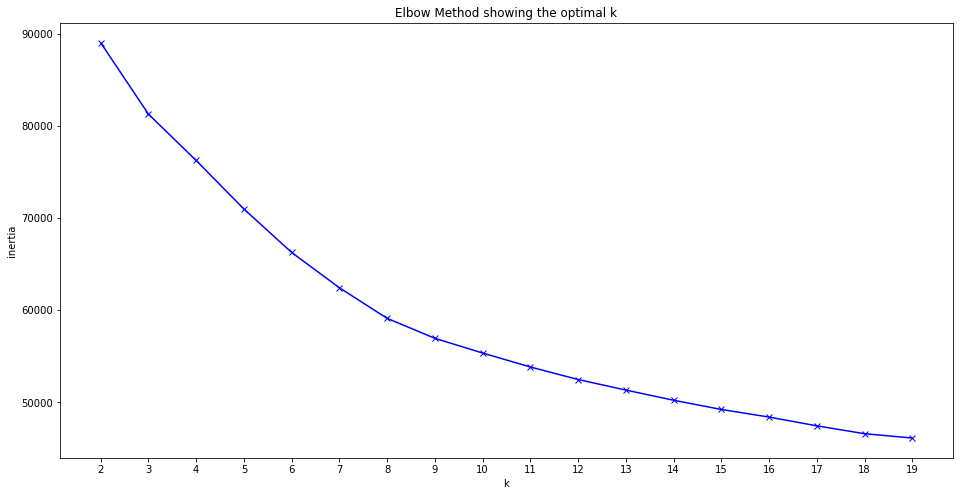

In [17]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silhouette

KMeans(n_clusters=2, random_state=1234)

KMeans(n_clusters=3, random_state=1234)

KMeans(n_clusters=4, random_state=1234)

KMeans(n_clusters=5, random_state=1234)

KMeans(n_clusters=6, random_state=1234)

KMeans(n_clusters=7, random_state=1234)

KMeans(random_state=1234)

KMeans(n_clusters=9, random_state=1234)

KMeans(n_clusters=10, random_state=1234)

KMeans(n_clusters=11, random_state=1234)

KMeans(n_clusters=12, random_state=1234)

KMeans(n_clusters=13, random_state=1234)

KMeans(n_clusters=14, random_state=1234)

KMeans(n_clusters=15, random_state=1234)

KMeans(n_clusters=16, random_state=1234)

KMeans(n_clusters=17, random_state=1234)

KMeans(n_clusters=18, random_state=1234)

KMeans(n_clusters=19, random_state=1234)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'silhouette score')

([<matplotlib.axis.XTick at 0x11cff187308>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

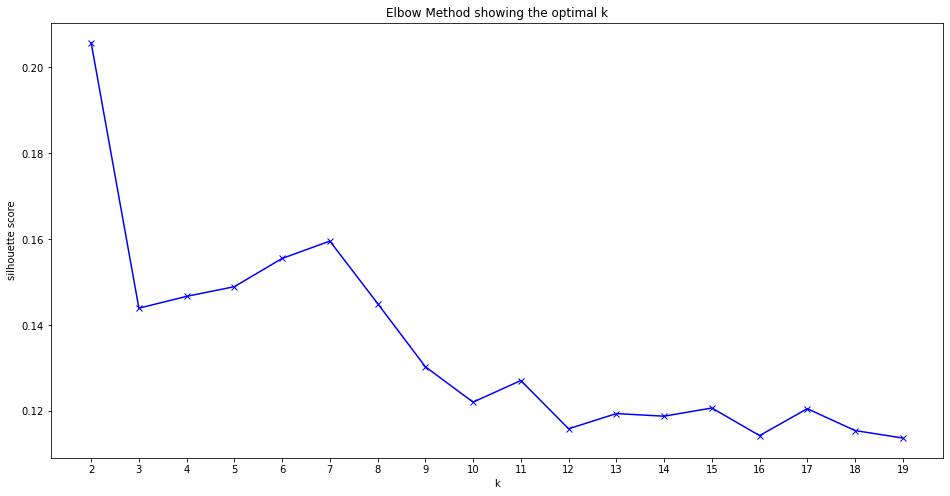

In [18]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

**Which k means should we choose?**

If we analyze inertia we should have 7 or 8 cluster. Looking to the silhouette our best choice would be 7 (as we are not interesting in having only 2 clusters).

According to this the best number of cluster should be 7. 

**K=7** 

In [19]:
#Let´s creat the clusters
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(X_scaled)

KMeans(n_clusters=7, random_state=1234)

In [20]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_scaled)
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

#the size of the clusters are kind of different. We appreciate two groups one smaller(4) and the other bigger(4)

0    2106
1    1942
2    3386
3     597
4     568
5     448
6     809
dtype: int64

In [21]:
#X["cluster"] = kmeans.predict(input_song)
spotify_data["cluster"] = clusters # = kmeans.predict(input_song)

In [24]:
spotify_data.head()
spotify_data.shape

,artist,song_title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Nosaj Thing,2K,0.310,0.445,7.0,-13.355,0.0,0.0863,0.0940,0.06780,0.1130,0.122,95.360,1
1,The Doors,4 Billion Souls,0.419,0.565,5.0,-11.565,1.0,0.0347,0.1370,0.33700,0.1280,0.648,151.277,2
2,Radiohead,4 Minute Warning,0.354,0.302,9.0,-13.078,1.0,0.0326,0.5900,0.07090,0.1110,0.223,123.753,1
3,Vitas,7 Element,0.727,0.785,5.0,-6.707,0.0,0.0603,0.3250,0.12600,0.3100,0.960,129.649,0
4,R.E.M.,#9 Dream,0.571,0.724,0.0,-5.967,1.0,0.0260,0.0231,0.00311,0.0919,0.385,116.755,2


(9856, 14)

# Assemble the project pipeline

When the user inputs a song, we should be able to:

- receive an input song from a user. let’s imagine it’s Bohemian Rhapsody
- check if Bohemian Rhapsody is hot. it’s not, so…
- send “Bohemian Rhapsody” to the Spotify API and get its audio features. store them in a variable called, for example, song_audio_features
- scale the audio features using song_scaled = scaler.transform(song_audio_features) (this is the scaler we created above!)
- get the cluster of the song, using kmeans.predict(song_scaled) (this is the kmeans model we created above!). Let’s imagine it’s cluster 3.
- rom your dataframe of collected songs X , get a song that belongs to cluster 3. Let’s imagine it’s Stairway to Heaven.
- print Stairway to Heaven: this is your recommendation!

In [30]:
hot_songs = pd.read_csv('hotsongs.csv') 

In [35]:
hot_songs.head()

,song_title,artist,rank
0,Rapstar,Polo G,1
1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),2
2,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,3
3,Montero (Call Me By Your Name),Lil Nas X,4
4,Levitating,Dua Lipa Featuring DaBaby,5


In [36]:
hot_songs= hot_songs.drop(['rank'],axis=1)
# data = data.drop(data[data['GENDER'].isnull()].index,axis=0) # with the index your selecting the 

In [37]:
hot_songs.head()

,song_title,artist
0,Rapstar,Polo G
1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak)
2,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon
3,Montero (Call Me By Your Name),Lil Nas X
4,Levitating,Dua Lipa Featuring DaBaby


In [ ]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

In [39]:
#Initialize SpotiPy with user credentials
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
string.split('\n')

secrets_dict={}
for line in string.split('\n'):
  secrets_dict[line.split(':')[0]]=line.split(':')[1]

#Initialize SpotiPy with user credentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

['cid:478c551298e948bdb4e86a7cc6785f95',
 'csecret:68c17960d1c1472197b061cb5c451a72']

### Recommender system

In [54]:
def recommender():
    song = str(input('Tell me a song! ').title())
    if song in list(hot_songs['song_title']):
        recommendation = hot_songs.sample()
        return "That song is super popular, you should also listen to " + recommendation['song_title'].values[0] + ' from ' + recommendation['artist'].values[0] + '!'
    else:
        results = sp.search(q=song, limit=1)
        song_uri = results["tracks"]['items'][0]["uri"]
        song_audio_features = sp.audio_features(song_uri)
        song_audio_features = pd.DataFrame(song_audio_features)
        song_audio_features.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis= 1, inplace=True)
        song_scaled = StandardScaler().fit_transform(song_audio_features)
        song_cluster = kmeans.predict(song_scaled)
        recommendation = spotify_data.loc[spotify_data['cluster']==int(song_cluster)].sample()
    return "That song is not in the hot list, but you would like to  listen to " + recommendation['song_title'].values[0] + ' from ' + recommendation['artist'].values[0] + '!'

In [55]:
recommender()

Tell me a song! Better Together


'That song is not in the hot list, but you would like to  listen to I Want It All from Arctic Monkeys!'

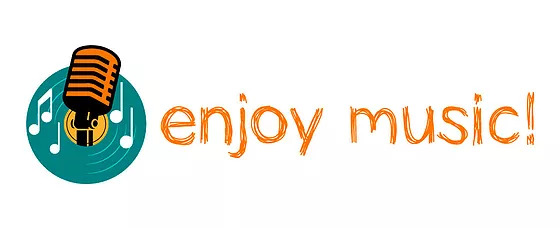

In [7]:
from IPython.display import Image
Image(filename='image2.png') 